In [23]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import sem, ttest_ind
from matplotlib import pyplot as plt
%matplotlib notebook

In [24]:
salary = "ceo_salary_aflcio.csv"
salary_df = pd.read_csv(salary, encoding="utf-8")
salary_df.head()

,Symbol,Name,CEO,YR,SALARY
0,TSLA,"Tesla, Inc.",Elon Musk,2018,2284044884
1,AAXN,"Axon Enterprise, Inc.",Patrick Smith,2018,246026710
2,DISCA,"Discovery, Inc.",David Zaslav,2018,129499005
3,ORCL,Oracle Corp.,Mark Hurd,2018,108295023
4,OMF,"OneMain Holdings, Inc.",Jay Levine,2018,71532583


In [25]:
consfin_csv = "company_data.csv"
com_df = pd.read_csv(consfin_csv)
com_df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [26]:
#Integrate CEO salary into Company data

allco_df = pd.merge(salary_df, com_df, on="Symbol")
allco_df.head()

,Symbol,Name_x,CEO,YR,SALARY,Name_y,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,DISCA,"Discovery, Inc.",David Zaslav,2018,129499005,Discovery Communications-A,Consumer Discretionary,22.87,11.00,0.000000,1.96,30.250,15.99,8763756733,2.100000e+09,1.804088,1.50,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,ORCL,Oracle Corp.,Mark Hurd,2018,108295023,Oracle Corp.,Information Technology,46.84,18.81,1.555146,2.20,53.140,40.01,202302349740,1.654500e+10,5.256165,3.56,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,DIS,The Walt Disney Co.,Robert Iger,2018,65645214,The Walt Disney Company,Consumer Discretionary,101.35,17.78,1.603665,5.70,116.100,96.20,157817273295,1.254400e+10,3.963556,3.82,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,FOXA,"Twenty-First Century Fox, Inc.",James Murdoch,2018,50263861,Twenty-First Century Fox Class A,Consumer Discretionary,34.56,17.81,0.998336,1.59,39.135,24.81,44027094922,5.280000e+09,2.108032,4.11,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,EL,"The Estee Lauder Companies, Inc.",Fabrizio Freda,2018,48753819,Estee Lauder Cos.,Consumer Staples,131.46,37.78,1.128350,3.35,138.740,81.69,49543264457,2.478000e+09,3.952258,10.82,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [27]:
#Get list of columns
allco_df.columns

Index(['Symbol', 'Name_x', 'CEO', 'YR', 'SALARY', 'Name_y', 'Sector', 'Price',
       'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low',
       '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book',
       'SEC Filings'],
      dtype='object')

In [28]:
some_allco_df = allco_df[["Symbol", "Name_x", "CEO", "SALARY", "Sector", "Price/Earnings"]]
some_allco_df.head()

,Symbol,Name_x,CEO,SALARY,Sector,Price/Earnings
0,DISCA,"Discovery, Inc.",David Zaslav,129499005,Consumer Discretionary,11.00
1,ORCL,Oracle Corp.,Mark Hurd,108295023,Information Technology,18.81
2,DIS,The Walt Disney Co.,Robert Iger,65645214,Consumer Discretionary,17.78
3,FOXA,"Twenty-First Century Fox, Inc.",James Murdoch,50263861,Consumer Discretionary,17.81
4,EL,"The Estee Lauder Companies, Inc.",Fabrizio Freda,48753819,Consumer Staples,37.78


In [29]:
#Rename a few columns
rename_allco = some_allco_df.rename(columns={"Name_x": "Company",
                                                "SALARY": "Salary",
                                                "Price/Earnings": "PE_Ratio",
                                                })
rename_allco.head()

,Symbol,Company,CEO,Salary,Sector,PE_Ratio
0,DISCA,"Discovery, Inc.",David Zaslav,129499005,Consumer Discretionary,11.00
1,ORCL,Oracle Corp.,Mark Hurd,108295023,Information Technology,18.81
2,DIS,The Walt Disney Co.,Robert Iger,65645214,Consumer Discretionary,17.78
3,FOXA,"Twenty-First Century Fox, Inc.",James Murdoch,50263861,Consumer Discretionary,17.81
4,EL,"The Estee Lauder Companies, Inc.",Fabrizio Freda,48753819,Consumer Staples,37.78


In [30]:
# Calculate the mean for Salary is $14,158,485
Salary_mean = rename_allco.Salary.mean()
Salary_mean

14158485.777777778

In [31]:
# Calculate the mean for Price/Earnings
pe_mean = rename_allco.PE_Ratio.mean()
pe_mean

25.42842450765865

In [32]:
#Get range for salary
rename_allco.Salary.min()

1

In [33]:
#Get range for salary - is $129,499,005
rename_allco.Salary.max()

129499005

In [34]:
#Get range for pe ratio
rename_allco.PE_Ratio.min()

-251.53

In [35]:
#Get range for pe ratio
rename_allco.PE_Ratio.max()

520.15

<IPython.core.display.Javascript object>


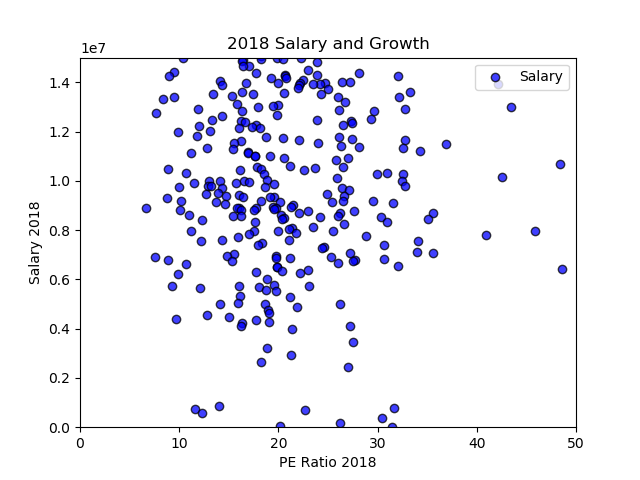

In [36]:
#Variables for scattergram
x_value = rename_allco["PE_Ratio"]
y_axis = rename_allco["Salary"]
x_limit = 50 #Max was 250, mean was 25, took out outliers
plt.ylim(1, 15000000) #Max is 130mil, took to down to 15mil
plt.xlim(0, x_limit) #Min is -255

x_axis = np.arange(0, x_limit, 50)

# Build the scatter plot
plt.scatter(x_value, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("2018 Salary and Growth")
plt.xlabel("PE Ratio 2018")
plt.ylabel("Salary 2018")
plt.legend(loc="upper right")

# Save Figure
plt.savefig("salary_per.png")

# Show plot
plt.show()

In [37]:
# Plot a line chart
#salary_pts, = plt.plot(rename_allco.loc['Salary'], 
                       #rename_allco.loc['PE_Ratio'], color="blue", label="Salary and Growth" )

# Create a legend 
#plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
#plt.show()

<IPython.core.display.Javascript object>


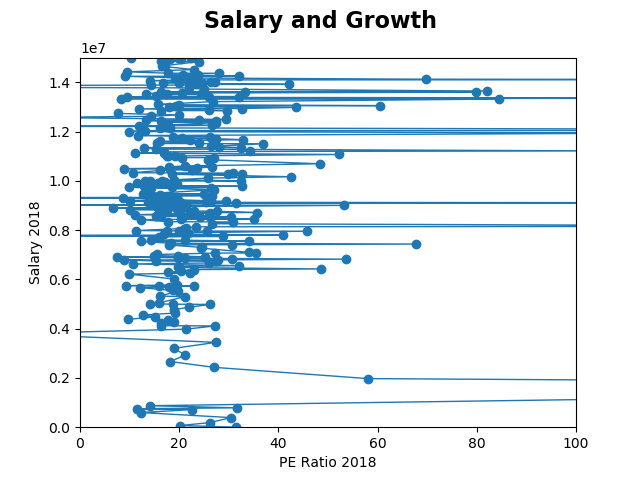

In [38]:
#Regression analysis
# Set data
x_axis = rename_allco["PE_Ratio"]
y_axis = rename_allco["Salary"]

# Set line
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

# Plot data
fig, ax = plt.subplots()

fig.suptitle("Salary and Growth", fontsize=16, fontweight="bold")

ax.set_xlim(0, 100)#Exclude outlier -255 and 520
ax.set_ylim(0, 15000000) #Exclude outlier Elon Musk $130mil

ax.set_xlabel("PE Ratio 2018")
ax.set_ylabel("Salary 2018")

ax.plot(x_axis, y_axis, linewidth=1, marker='o')
ax.plot(x_axis, fit, 'b--')

# Save Figure
plt.savefig("salary_regression.png")

plt.show()

In [39]:
# Import location data for companies

corp_hq = "corp_head_b.csv"
headq_df = pd.read_csv(corp_hq, encoding="utf-8")
headq_df.head()

,X,Y,FID,OBJECTID,RANK,Company,ADDRESS,ADDRESS2,City,State,...,EMPLOYEES,REVENUES,LATITUDE,LONGITUDE,SOURCE,PRC,COUNTYFIPS,COMMENTS,WEBSITE,PROFIT
0,-116.18099,43.59974,1,1,49,Albertsons Cos.,250 PARKCENTER BOULEVARD,NOT AVAILABLE,Boise,ID,...,274000,58734,43.59974,-116.18099,BING MAPS,ADDRESS,16001,NOT AVAILABLE,HTTPS://WWW.ALBERTSONS.COM/#1,-502.2
1,-116.14697,43.52925,2,2,226,Micron Technology,8000 SOUTH FEDERAL WAY,NOT AVAILABLE,Boise,ID,...,31400,12399,43.52925,-116.14697,BING MAPS,ADDRESS,16001,NOT AVAILABLE,HTTPS://WWW.MICRON.COM/,-276.0
2,-79.43739,36.09317,3,3,290,Laboratory Corp. Of America,358 SOUTH MAIN STREET,NOT AVAILABLE,Burlington,NC,...,52000,9642,36.09317,-79.43739,BING MAPS,ADDRESS,37001,NOT AVAILABLE,HTTPS://WWW.LABCORP.COM/,732.1
3,-121.95694,37.48860,4,4,440,Lam Research,4650 CUSHING PARKWAY,NOT AVAILABLE,Fremont,CA,...,7500,5886,37.48860,-121.95694,BING MAPS,ADDRESS,6001,NOT AVAILABLE,HTTPS://WWW.LAMRESEARCH.COM/,914.0
4,-121.97965,37.49628,5,5,198,Synnex,44201 NOBEL DRIVE,NOT AVAILABLE,Fremont,CA,...,110000,14062,37.49628,-121.97965,BING MAPS,ADDRESS,6001,NOT AVAILABLE,HTTPS://WWW.SYNNEXCORP.COM/,234.9


In [40]:
#New dataframe with just Company, City, State

corp_with_hq = headq_df[["Company", "City", "State"]]
corp_with_hq.head()

,Company,City,State
0,Albertsons Cos.,Boise,ID
1,Micron Technology,Boise,ID
2,Laboratory Corp. Of America,Burlington,NC
3,Lam Research,Fremont,CA
4,Synnex,Fremont,CA


In [41]:
#Merge headquarters data with latest dataframe, merge on Name

allco_with_hq = pd.merge(rename_allco, corp_with_hq, on="Company")
allco_with_hq

,Symbol,Company,CEO,Salary,Sector,PE_Ratio,City,State
0,MS,Morgan Stanley,James Gorman,28168639,Financials,14.23,New York,NY
1,ABT,Abbott Laboratories,Miles White,24254238,Health Care,22.51,Santa Monica,CA
2,JNJ,Johnson & Johnson,Alex Gorsky,20097572,Health Care,17.31,New Brunswick,NJ
3,PSX,Phillips 66,Greg Garland,19278335,Energy,21.11,Houston,TX
4,STT,State Street Corp.,Joseph Hooley,16102525,Financials,15.35,Boston,MA
5,ES,Eversource Energy,James Judge,14925381,Utilities,18.22,Springfield,MA
6,USB,U.S. Bancorp,Andrew Cecere,13437128,Financials,15.35,Minneapolis,MN
7,NWSA,News Corp.,Robert Thomson,12977958,Consumer Discretionary,43.47,New York,NY
8,SYF,Synchrony Financial,Margaret Keane,12449138,Financials,13.35,Stamford,CT
9,FITB,Fifth Third Bancorp,Greg Carmichael,11173652,Financials,16.90,Cincinnati,OH


In [42]:
#Import State Data

popln = "state_pop.csv"
popln_df = pd.read_csv(popln, encoding="utf-8")
popln_df.head()

,Rank_State,State,State_Pop,State_Pop_Percent
0,23,AL,4887871,0.0148
1,48,AK,737438,0.0022
2,55,AS,55641,0.0002
3,16,AZ,7171646,0.0217
4,33,AR,3013825,0.0091


In [43]:
#Merge State population ranking and numbers with current corporate dataframe

allco_pop_hq = pd.merge(allco_with_hq, popln_df, on="State")
allco_pop_hq.head()

,Symbol,Company,CEO,Salary,Sector,PE_Ratio,City,State,Rank_State,State_Pop,State_Pop_Percent
0,MS,Morgan Stanley,James Gorman,28168639,Financials,14.23,New York,NY,4,19542209,0.0591
1,NWSA,News Corp.,Robert Thomson,12977958,Consumer Discretionary,43.47,New York,NY,4,19542209,0.0591
2,MTB,M&T Bank Corp.,Rene Jones,4770132,Financials,18.91,Buffalo,NY,4,19542209,0.0591
3,ABT,Abbott Laboratories,Miles White,24254238,Health Care,22.51,Santa Monica,CA,1,39557045,0.1196
4,EIX,Edison International,Pedro Pizarro,9777523,Utilities,13.23,Rosemead,CA,1,39557045,0.1196


In [45]:
#Import Math Employee data

math_emp = "BLS_math_employees.csv"
math_df = pd.read_csv(math_emp, encoding="utf-8")
math_df.head()

,State Name,State,Employ_No,Mean_wage_yr,Median_wage_yr,Employ per 1000 jobs
0,Alabama,AL,41560,84290,79020,21.381
1,Alaska,AK,5280,80280,77000,16.748
2,Arizona,AZ,94060,83140,79130,33.718
3,Arkansas,AR,23160,68290,63450,19.135
4,California,CA,616270,108190,103310,36.235


In [46]:
#Merge Math Employees Data with Corporate data by State
corp_employ_pop = pd.merge(allco_pop_hq, math_df, on="State")
corp_employ_pop.head()

,Symbol,Company,CEO,Salary,Sector,PE_Ratio,City,State,Rank_State,State_Pop,State_Pop_Percent,State Name,Employ_No,Mean_wage_yr,Median_wage_yr,Employ per 1000 jobs
0,MS,Morgan Stanley,James Gorman,28168639,Financials,14.23,New York,NY,4,19542209,0.0591,New York,264620,97320,90060,28.194
1,NWSA,News Corp.,Robert Thomson,12977958,Consumer Discretionary,43.47,New York,NY,4,19542209,0.0591,New York,264620,97320,90060,28.194
2,MTB,M&T Bank Corp.,Rene Jones,4770132,Financials,18.91,Buffalo,NY,4,19542209,0.0591,New York,264620,97320,90060,28.194
3,ABT,Abbott Laboratories,Miles White,24254238,Health Care,22.51,Santa Monica,CA,1,39557045,0.1196,California,616270,108190,103310,36.235
4,EIX,Edison International,Pedro Pizarro,9777523,Utilities,13.23,Rosemead,CA,1,39557045,0.1196,California,616270,108190,103310,36.235


In [ ]:
#Next Analysis. Grouping by State/ Grouping by sector
